In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt



In [3]:
#깃허브 데이터 설치
!git clone https://github.com/taehojo/data-ch20.git

fatal: destination path 'data-ch20' already exists and is not an empty directory.


In [4]:
#학습셋의 변형을 설정하는 부분입니다.
train_datagen = ImageDataGenerator(rescale=1./255,#주어진 이미지 크기를 설정
                                   horizontal_flip=True,#수평 대칭 이미지를 50%확률로 만들어 추가
                                   width_shift_range=0.1#전체크기의 15%범위에서 좌우로 이동
                                   ,height_shift_range=0.1)
#마찬가지로 위아래로 이동
train_generator = train_datagen.flow_from_directory(
    './data-ch20/train',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.


In [5]:
#테스트셋은 이미지 부풀리기 과정을 진행x
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data-ch20/test',
    target_size=(150,150),
    batch_size=5,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


In [6]:
#앞서 배운 CNN모델 적용
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [7]:
#모델의실행옵션
model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(
    learning_rate=0.0002),metrics=['accuracy'])

In [8]:
#학습조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=5)


In [9]:
#모델을 싱행
his = model.fit(
    train_generator,epochs=100,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/100
32/32 [==============================] - 4s 17ms/step - loss: 0.7106 - accuracy: 0.4313 - val_loss: 0.6885 - val_accuracy: 0.5200
Epoch 2/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6840 - accuracy: 0.5625 - val_loss: 0.6811 - val_accuracy: 0.5800
Epoch 3/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6982 - accuracy: 0.4563 - val_loss: 0.6816 - val_accuracy: 0.5400
Epoch 4/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6807 - accuracy: 0.5250 - val_loss: 0.6607 - val_accuracy: 0.6800
Epoch 5/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6761 - accuracy: 0.6062 - val_loss: 0.6854 - val_accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6618 - accuracy: 0.6125 - val_loss: 0.6585 - val_accuracy: 0.5200
Epoch 7/100
32/32 [==============================] - 0s 13ms/step - loss: 0.6427 - accuracy: 0.6500 - val_loss: 0.5779 - val_accuracy: 0.7800
Epoch 

In [12]:
#검증셋과 학습셋의; 오차를 저장합니다.
y_vloss = his.history['val_loss']
y_loss = his.history['loss']

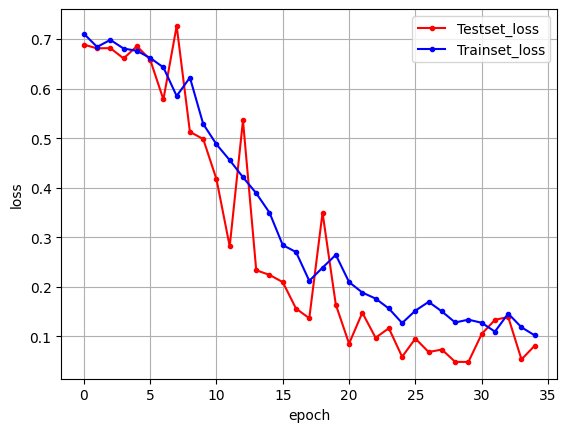

In [13]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
#그래프에 그리드+레이블
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()